In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
URL="https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=HND,NRT,TPE,HKG,KIX;s=1;li=6;lx=12;d=2018-02-01"
# 下载http://phantomjs.org/download.html，并指定可执行文件的路径
PJS_PATH = '/Users/palance/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs'
driver = webdriver.PhantomJS(PJS_PATH)
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.80 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap, executable_path=PJS_PATH)
driver.implicitly_wait(20)
driver.get(URL)

In [3]:
# 等上一步执行完了再执行本步，否则截取到的屏幕是还没加载出网页的
driver.save_screenshot(r'flight_explorer.png')

True

In [4]:
s = BeautifulSoup(driver.page_source, "lxml")

<!DOCTYPE html>
<html lang="en-US"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="baseUrl=/flights/explore//static/" name="deals::gwt:property"/><title>Explore flights</title><meta content="Explore flights" name="description"/><script async="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.yoTdpQipo6s.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/am=AAE/rs=AHpOoo9_VhuRoUovwpPPf5LqLZd-dmCnxw/cb=gapi.loaded_0"></script><script language="javascript" type="text/javascript">
var __JS_ILT__ = new Date();
</script>
<style type="text/css">@-webkit-keyframes gb__a{0%{opacity:0}50%{opacity:1}}@keyframes gb__a{0%{opacity:0}50%{opacity:1}}.gb_8a{display:none!important}.gb_9a{visibility:hidden}.gb_5c{display:inline-block;padding:0 0 0 15px;vertical-align:middle}.gb_5c:first-child,#gbsfw:first-child+.gb_5c{padding-left:0}.gb_Mc{position:relative}.gb_b{display:inline-block;outline:none;vertical-align:middle;-webkit-border-ra
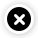
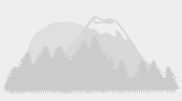

In [5]:
s

In [8]:
# best_price_tags = s.findAll('div', 'FTWFGDB-w-e') 
best_price_tags = s.findAll('span', 'CTPFVNB-v-k') # 获取最佳价格列表
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$',''))) # 删除$符号，剩下就是价钱的数值了

In [9]:
best_price_tags

[<span class="CTPFVNB-v-k">$458</span>,
 <span class="CTPFVNB-v-k">$598</span>,
 <span class="CTPFVNB-v-k">$866</span>,
 <span class="CTPFVNB-v-k">$869</span>]

In [10]:
best_price = best_prices[0]
best_price # 拥有最便宜票价的城市的票价

458

In [14]:
best_height_tags = s.findAll('div', 'CTPFVNB-w-x') # 得到每个条的高度
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
                              .split('height:')[1].replace('px;','')))
best_heights

[55.64266433879693,
 56.275783645949396,
 55.64266433879693,
 55.64266433879693,
 80.389106488554,
 77.82619083171569,
 98.68260185387257,
 76.41384776191406,
 88.22395791456564,
 106.0,
 99.93666509688609,
 93.84897945118941,
 93.84897945118941,
 90.90253959867219,
 90.90253959867219,
 106.0,
 102.6639482661582,
 98.52432202708445,
 102.6639482661582,
 86.22719702277713,
 76.41384776191406,
 90.90253959867219,
 88.22395791456564,
 86.22719702277713,
 82.37977969469682,
 93.89768093635496,
 86.22719702277713,
 82.37977969469682,
 76.41384776191406,
 88.22395791456564,
 86.22719702277713,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 88.22395791456564,
 86.22719702277713,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 88.22395791456564,
 88.22395791456564,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 76.41384776191406,
 88.22395791456564,
 88.2

In [15]:
best_height = best_heights[0]
best_height

55.64266433879693

In [17]:
pph = np.array(best_price)/np.array(best_height) # 计算该高度对应的价格
pph

8.2310939895208932

In [18]:
# cities = s.findAll('div', 'FTWFGDB-w-o')
cities = s.findAll('span', 'CTPFVNB-v-c')
cities

[<span act="cityName" class="CTPFVNB-v-c">Taipei, Taiwan</span>,
 <span act="cityName" class="CTPFVNB-v-c">Hong Kong, Hong Kong</span>,
 <span act="cityName" class="CTPFVNB-v-c">Tokyo, Japan</span>,
 <span act="cityName" class="CTPFVNB-v-c">Osaka, Japan</span>]

In [ ]:
len(cities)

In [ ]:
hlist=[]
for bar in cities[0]\
    .findAll('div', 'FTWFGDB-w-x'):
    hlist.append(float(bar['style']\
                       .split('height: ')[1].replace('px;',''))*pph)

In [ ]:
fares = pd.DataFrame(hlist, columns=['price'])

In [ ]:
fares.min()

In [ ]:
fares

In [ ]:
fares.median()

In [ ]:
fares.describe()

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price']);

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [ ]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [ ]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o',
                 markerfacecolor=c,
                 markeredgecolor='k',
                 markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)

In [ ]:
px = [x for x in fares['price']]

In [ ]:
px[55]

In [ ]:
test_clusters(px, 1.5, 55, 700)

In [ ]:
px[55]

In [ ]:
px[55] = 625

In [ ]:
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [ ]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=1.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [ ]:
pf = pd.concat([ff,pd.DataFrame(db.labels_,
                                columns=['cluster'])], axis=1)
pf

In [ ]:
rf = pf.groupby('cluster')['fare'].agg(['min','count']).sort_values('min', ascending=True)
rf

In [ ]:
rf.iloc[0]['min']

In [ ]:
pf['fare'].min()

In [ ]:
rf.describe([.10,.25,.5,.75,.9])

In [ ]:
# we want min of the price cluster to equal the overall min 
# as well as to be in the bottom quartile of sizes

In [ ]:
rf['count'].quantile(.10)

In [ ]:
pd.Series([50,6,4]).quantile(.10)